In [1]:
library(ggplot2)
library(dplyr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Intersect A1 and h38 precursors

In [2]:
setwd("~/piRNA/Workspaces/julia/lnc")
intersect<- read.table("intersect_A1_h38.bed", header=FALSE)

In [3]:
head(intersect)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
chr1,1560847,1560848,1,chr1,1560847,1574584,Prepachytene,pi-SSU72,13737
chr1,1560848,1560849,1,chr1,1560847,1574584,Prepachytene,pi-SSU72,13737
chr1,1560849,1560850,1,chr1,1560847,1574584,Prepachytene,pi-SSU72,13737
chr1,1560850,1560851,1,chr1,1560847,1574584,Prepachytene,pi-SSU72,13737
chr1,1560851,1560852,1,chr1,1560847,1574584,Prepachytene,pi-SSU72,13737
chr1,1560852,1560853,1,chr1,1560847,1574584,Prepachytene,pi-SSU72,13737


In [4]:
nrow(intersect)
length(unique(intersect$V9))

[1] 2802226

[1] 182

All precursors intersect at least 1

Create a dataframe of the precursors data

In [5]:
new_df <- intersect %>%
  distinct(V9) %>%
  select(V9)

row.names(new_df) <- new_df$V9
colnames(new_df)[1]<-"Precursor_Name"

reads<- intersect %>%
    group_by(V9) %>%
    summarize(reads = sum(V4)/n()) %>%
    pull(reads)
new_df$mean_coverage <- reads
sum_coverage<- intersect %>%
    group_by(V9) %>%
    summarize(sum_coverage = sum(V4)) %>%
    pull(sum_coverage)
new_df$sum_coverage <- sum_coverage
peaks <- intersect %>%
  group_by(V9) %>%
  summarize(total_peaks = sum(V4>50)) %>%
  pull(total_peaks)
new_df$number_peaks<-peaks
len_size <- intersect %>%
  group_by(V9) %>%
  summarize(len_size = max(V7-V6)) %>%
  pull(len_size)
new_df$len_size<-len_size

new_df$total_reads<-nrow(intersect)
max_coverage<- intersect %>%
  group_by(V9) %>%
  summarize(max_coverage = max(V4)) %>%
  pull(max_coverage)
new_df$max_coverage<-max_coverage
head(new_df)

,Precursor_Name,mean_coverage,sum_coverage,number_peaks,len_size,total_reads,max_coverage
pi-SSU72,pi-SSU72,48.70480,380141,1728,84295,2802226,1972
pi-SLC35E2B,pi-SLC35E2B,304.50741,1623938,2881,6360,2802226,4621
1-p36-1107,1-p36-1107,22.21097,60747,368,17793,2802226,308
pi-NOTCH2NL,pi-NOTCH2NL,1167.50242,5312136,2961,6595,2802226,20365
pi-ZBTB37,pi-ZBTB37,34.41214,103202,613,3191,2802226,364
1-q25-2976,1-q25-2976,409.32725,7854990,14045,19914,2802226,18503


# Dataframe of the precursors aving low coverage and low number of peaks

In [10]:
precursors= new_df %>% filter(number_peaks<50
                              & mean_coverage<100)

In [11]:
nrow(precursors)

[1] 14

In [12]:
precursors

,Precursor_Name,mean_coverage,sum_coverage,number_peaks,len_size,total_reads,max_coverage
pi-TEX261,pi-TEX261,4.211277,30696,0,115121,2802226,44
3-q22-367,3-q22-367,1.000000,120,0,32581,2802226,1
pi-JRK,pi-JRK,8.756281,10455,28,15197,2802226,96
12-p13-1820,12-p13-1820,5.300923,155651,49,121011,2802226,59
pi-GOLGA8B,pi-GOLGA8B,5.348837,1150,0,31291,2802226,19
pi-TP53DP1,pi-TP53DP1,7.650624,17168,4,58310,2802226,53
15-q26-7771,15-q26-7771,5.612314,44848,0,14448,2802226,41
pi-PDPK1,pi-PDPK1,1.745353,939,0,83910,2802226,8
16-q22-2322,16-q22-2322,9.895974,115773,29,88081,2802226,61
17-q24-747,17-q24-747,7.385508,26093,46,13737,2802226,70


In [52]:
14/182

[1] 0.07692308

Just 14 precursors (8%) has low coverage and low number of peaks

# Intersect A1, h38 and annotation

In [2]:
setwd("~/piRNA/Workspaces/julia/lnc")
intersect<- read.table("intersect_A1_h38_all.bed", header=FALSE)

In [3]:
nrow(intersect)

[1] 1444729

In [4]:
length(unique(intersect$V9))

[1] 152

A total of 152 precursors

In [5]:
intersect_unique <- intersect %>%
    group_by(V9) %>%
    slice(which.max(V4))
table(intersect_unique$V8)


      Hybrid    Pachytene Prepachytene 
           7           80           65 

4,6% Hybrid
52,6% Pachytene
42,7% Prepachytene

# TOP 10 HAVING HIGHEST COVERAGE

In [6]:
head(arrange(intersect_unique, desc(V4)), 10)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
chr15,62239094,62239095,80456,chr15,62223875,62282161,Pachytene,15-q22-56093,58286,chr15,62235199,62242840,XLOC_048161
chr6,33900489,33900490,43790,chr6,33893163,33918208,Pachytene,6-p21-43244,25045,chr6,33893093,33914794,LOC105375026
chr15,62221785,62221786,33982,chr15,62196008,62224182,Pachytene,15-q22-8218,28174,chr15,62219310,62224142,XLOC_050853
chr6,40378446,40378447,30840,chr6,40378336,40379885,Pachytene,pi-TDRG1,1549,chr6,40378337,40379893,TDRG1
chr19,16037964,16037965,29038,chr19,16033653,16041254,Pachytene,19-p13-25455,7601,chr19,16033713,16042135,LINC00905
chr15,51292059,51292060,25484,chr15,51248620,51303101,Pachytene,pi-CYP19A1,54481,chr15,51289323,51293682,XLOC_050546
chr10,28792830,28792831,20365,chr10,28789400,28795995,Pachytene,10-p11-10777,6595,chr10,28789311,28796050,LINC00837
chr10,77770324,77770325,18503,chr10,77763999,77783913,Pachytene,10-q22-16903,19914,chr10,77766383,77773595,XLOC_016165
chr15,92571413,92571414,13850,chr15,92567817,92580775,Pachytene,15-q26-13520,12958,chr15,92567818,92572263,LINC00930
chr19,19747679,19747680,12658,chr19,19741552,19754992,Pachytene,19-p13-6652,13440,chr19,19745229,19753672,LOC101060187


# 	15-q22-56093 precursor

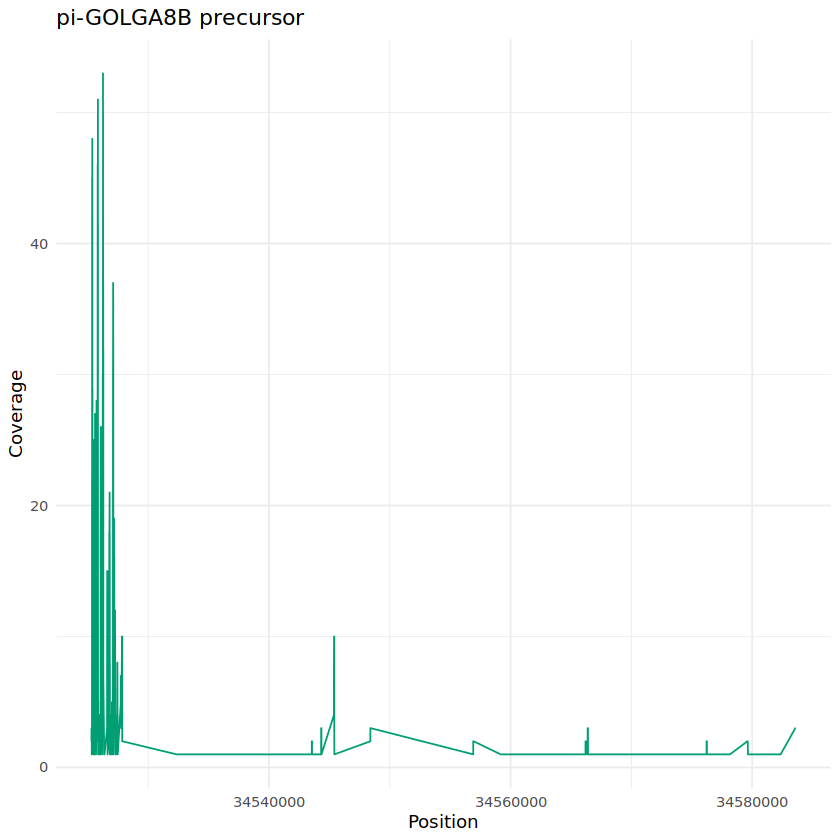

In [15]:
precursor1 <- subset(intersect, intersect[, 9] == "pi-GOLGA8B")
ggplot(precursor1, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("pi-GOLGA8B precursor")

# 6-p21-43244 precursor

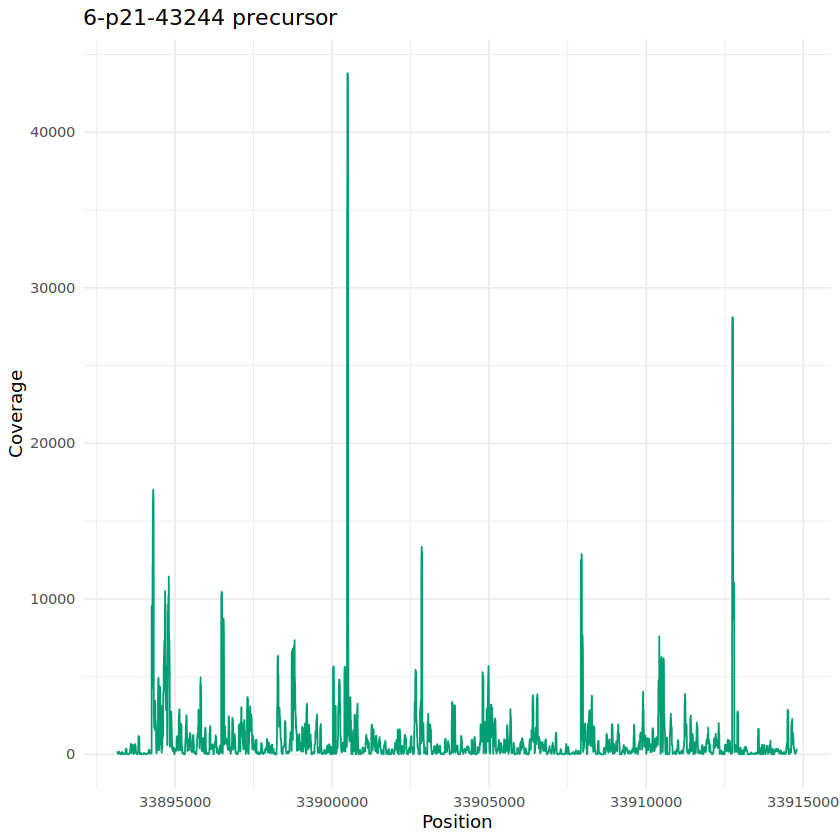

In [125]:
precursor2 <- subset(intersect, intersect[, 9] == "6-p21-43244")
ggplot(precursor2, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("6-p21-43244 precursor")

# 	15-q22-8218 precursor

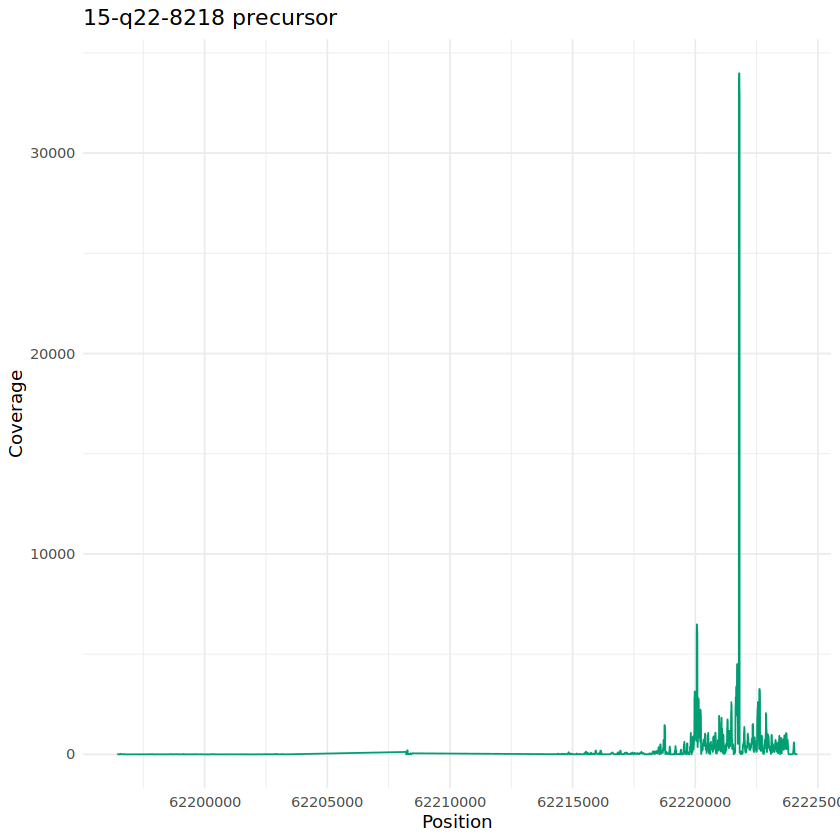

In [126]:
precursor3 <- subset(intersect, intersect[, 9] == "15-q22-8218")
ggplot(precursor3, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("15-q22-8218 precursor")

# pi-TDRG1

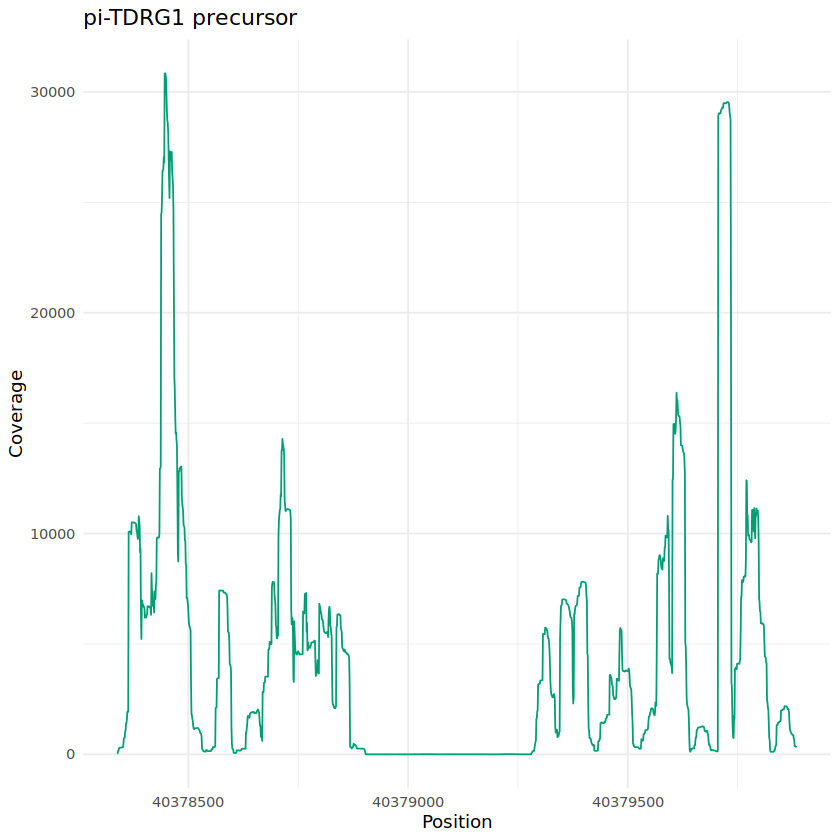

In [127]:
precursor4 <- subset(intersect, intersect[, 9] == "pi-TDRG1")
ggplot(precursor4, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("pi-TDRG1 precursor")

# 19-p13-25455

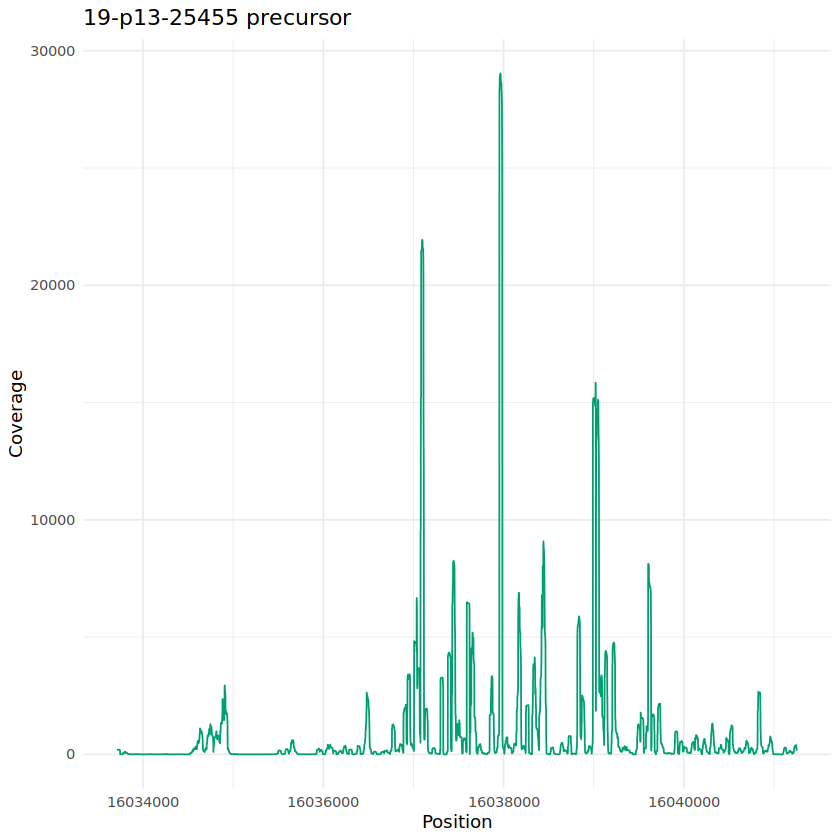

In [128]:
precursor5 <- subset(intersect, intersect[, 9] == "19-p13-25455")
ggplot(precursor5, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("19-p13-25455 precursor")

# pi-CYP19A1

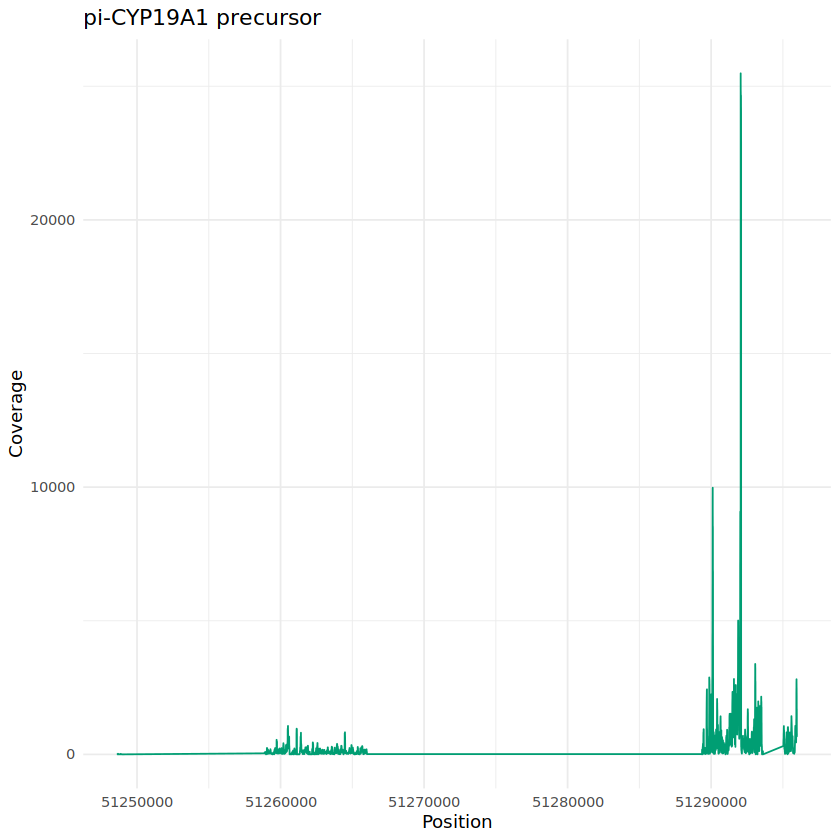

In [129]:
precursor6 <- subset(intersect, intersect[, 9] == "pi-CYP19A1")
ggplot(precursor6, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("pi-CYP19A1 precursor")

# 10-p11-10777

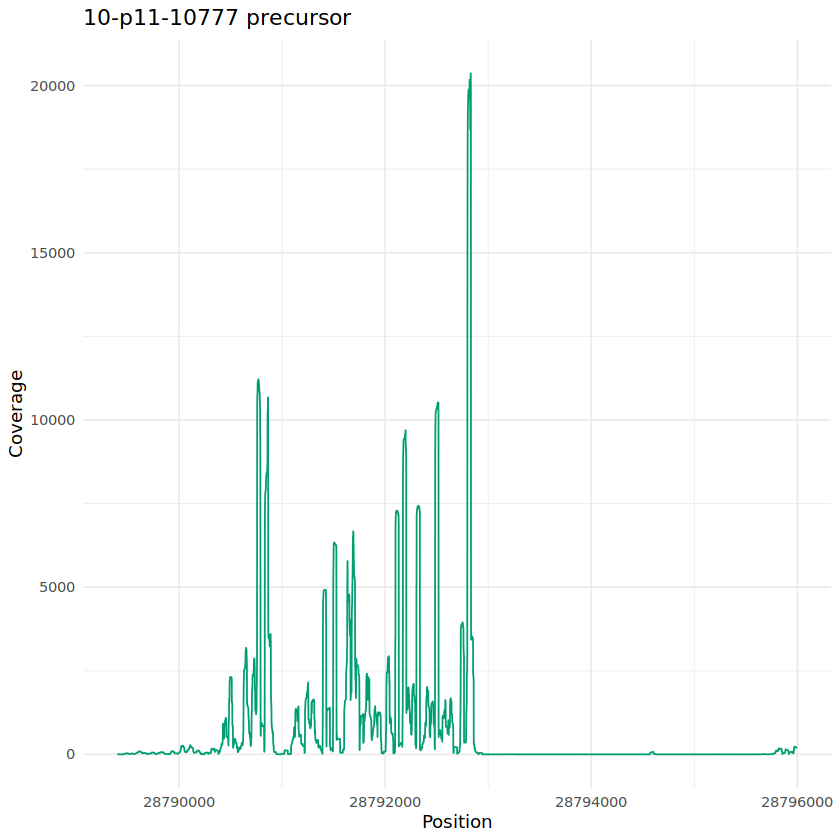

In [130]:
precursor7 <- subset(intersect, intersect[, 9] == "10-p11-10777")
ggplot(precursor7, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("10-p11-10777 precursor")

# 10-q22-16903

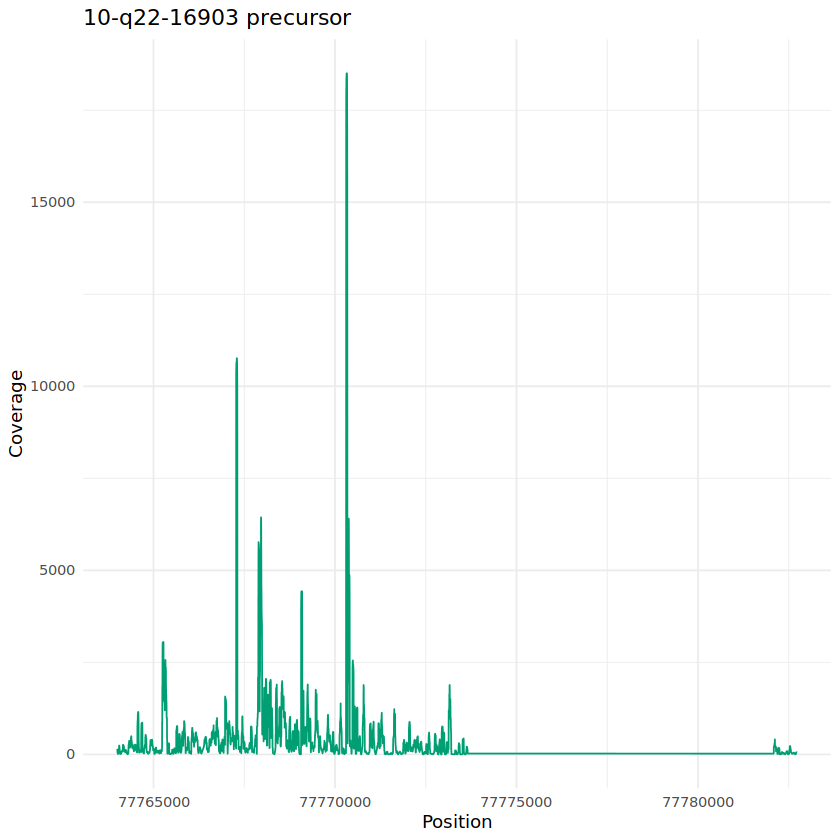

In [131]:
precursor8 <- subset(intersect, intersect[, 9] == "10-q22-16903")
ggplot(precursor8, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("10-q22-16903 precursor")

# 15-q26-13520

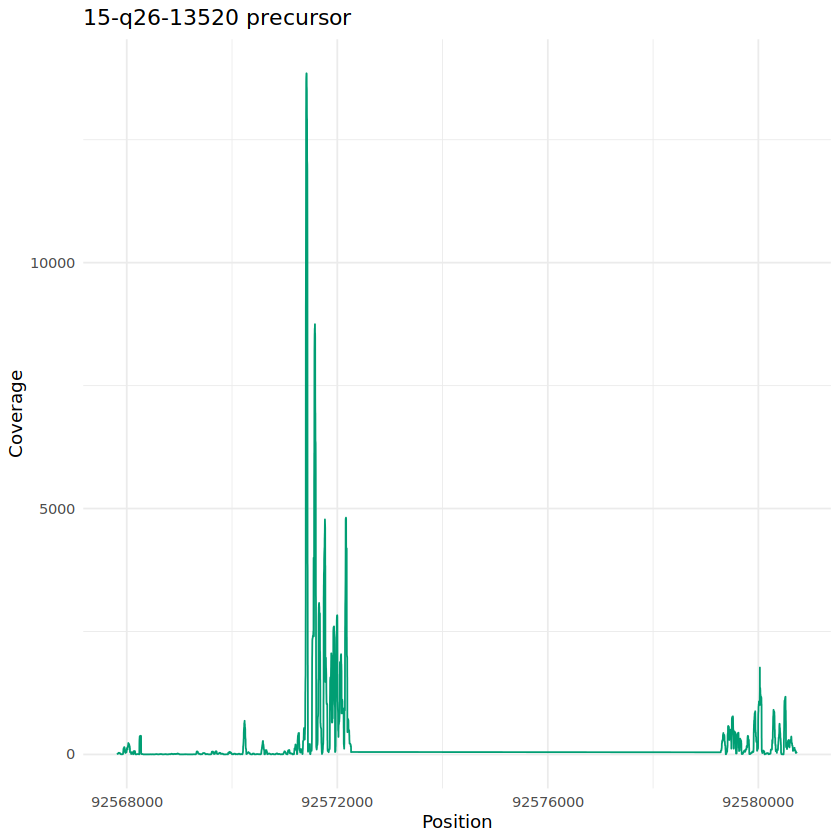

In [132]:
precursor9 <- subset(intersect, intersect[, 9] == "15-q26-13520")
ggplot(precursor9, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("15-q26-13520 precursor")

# 19-p13-6652

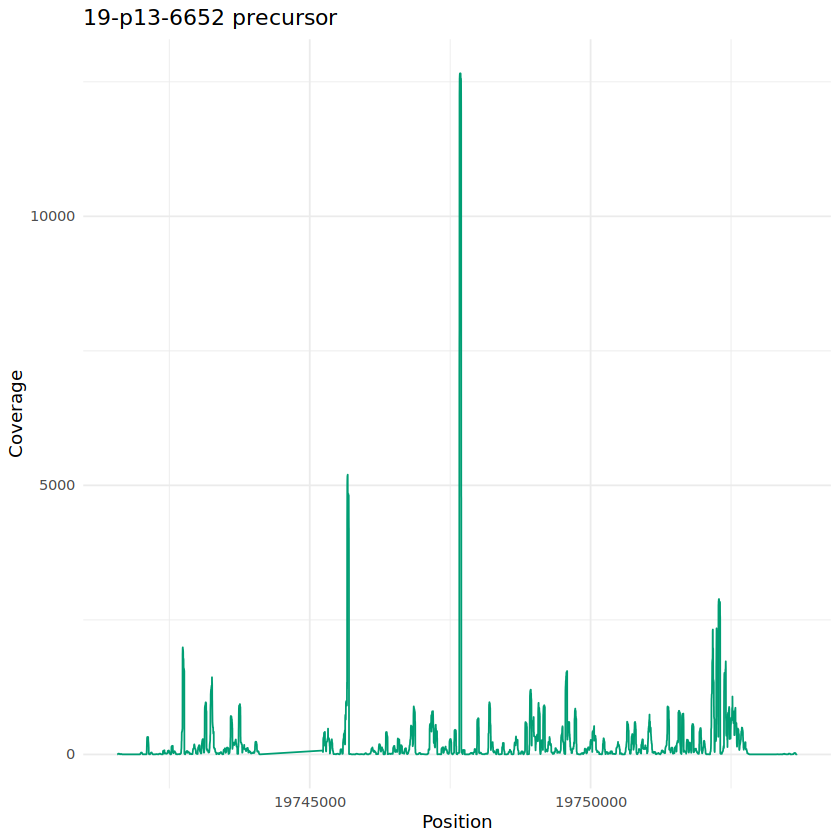

In [133]:
precursor10 <- subset(intersect, intersect[, 9] == "19-p13-6652")
ggplot(precursor10, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("19-p13-6652 precursor")

# Plot the ones containing coverage 0

In [152]:
head(arrange(intersect,(V4)), 20)
nrow(intersect %>% filter(V4==0))

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
chr1,24251540,24251541,0,chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251540,24254842,XLOC_008295
chr3,44566825,44566826,0,chr3,44555207,44581042,Prepachytene,pi-ZKSCAN7,25835,chr3,44557357,44685653,ZKSCAN7-AS1
chr3,44566825,44566826,0,chr3,44555207,44581042,Prepachytene,pi-ZKSCAN7,25835,chr3,44557357,44685653,ZKSCAN7-AS1
chr3,44576418,44576419,0,chr3,44555207,44581042,Prepachytene,pi-ZKSCAN7,25835,chr3,44557357,44685653,ZKSCAN7-AS1
chr3,44576418,44576419,0,chr3,44555207,44581042,Prepachytene,pi-ZKSCAN7,25835,chr3,44557357,44685653,ZKSCAN7-AS1
chr5,113168297,113168298,0,chr5,113022098,113488830,Prepachytene,pi-MCC,466732,chr5,113167075,113171984,XLOC_119117
chr5,176171555,176171556,0,chr5,176143084,176185155,Pachytene,5-q35-600,42071,chr5,176171547,176171894,XLOC_120735
chr5,176171555,176171556,0,chr5,176143084,176185155,Pachytene,5-q35-600,42071,chr5,176126841,176238347,LOC107986487
chr5,176171555,176171556,0,chr5,176143084,176185155,Pachytene,5-q35-600,42071,chr5,176126841,176238347,LOC107986487
chr6,34327250,34327251,0,chr6,34279678,34426071,Prepachytene,pi-NUDT3,146393,chr6,34316889,34328264,XLOC_126666


[1] 73

73 basepairs have a coverage of 0

# 1-p36-1107 precursor

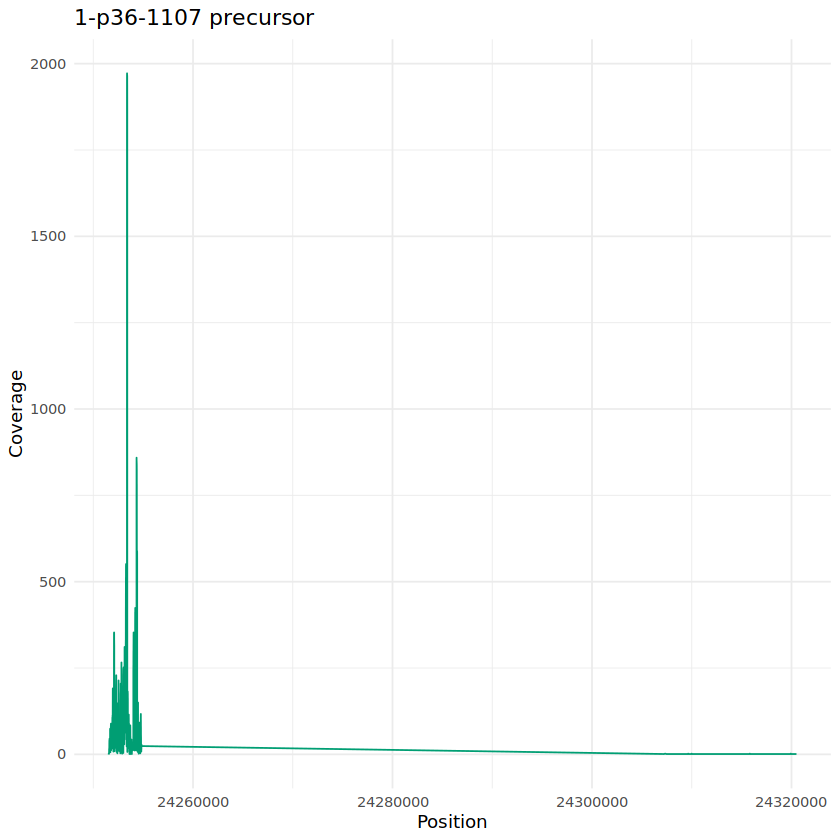

In [35]:

precursor <- subset(intersect, intersect[, 9] == "1-p36-1107")
cbPalette <- c( "#E69F00",  "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
ggplot(precursor, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("1-p36-1107 precursor")

# pi-ZKSCAN7 precursor

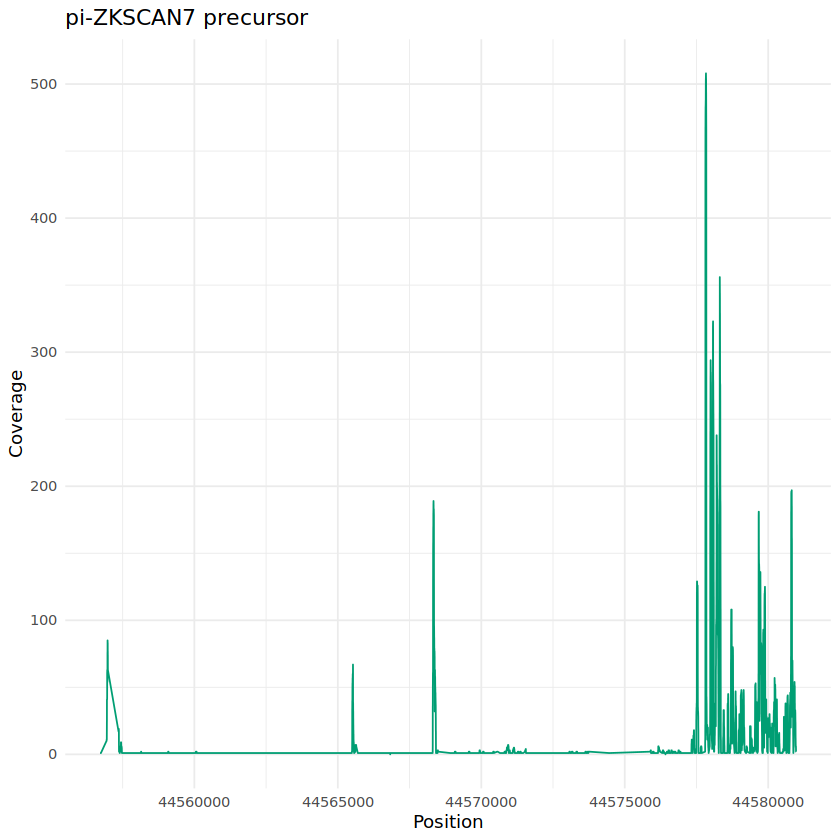

In [36]:
precursor <- subset(intersect, intersect[, 9] == "pi-ZKSCAN7")
cbPalette <- c( "#E69F00",  "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
ggplot(precursor, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("pi-ZKSCAN7 precursor")

# pi-MCC prursor

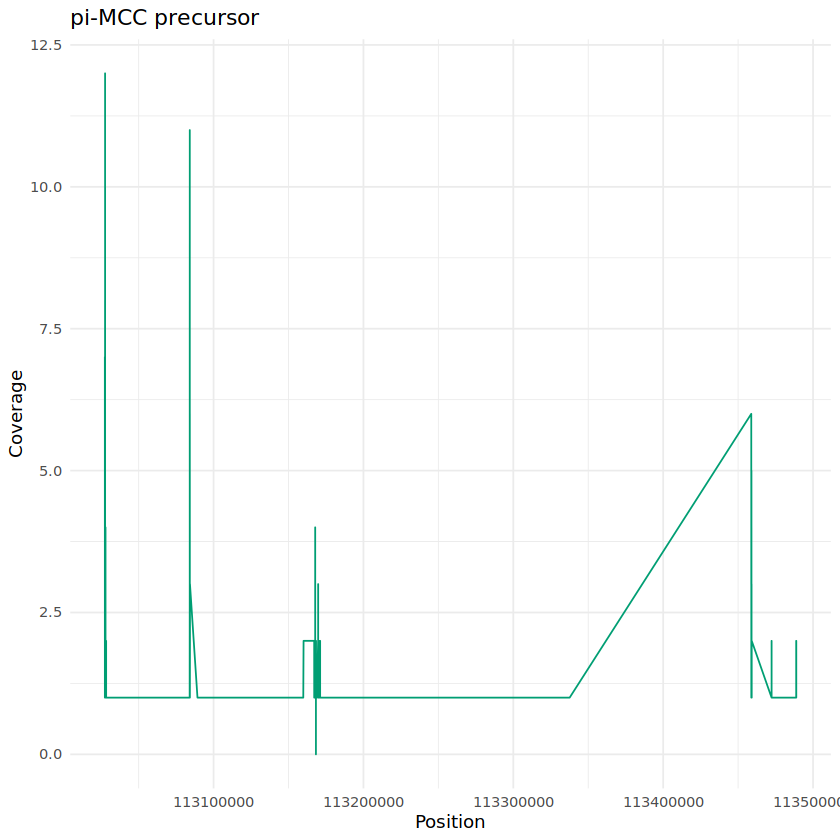

In [37]:
precursor <- subset(intersect, intersect[, 9] == "pi-MCC")
cbPalette <- c( "#E69F00",  "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
ggplot(precursor, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("pi-MCC precursor")

# 5-q35-600 precursor

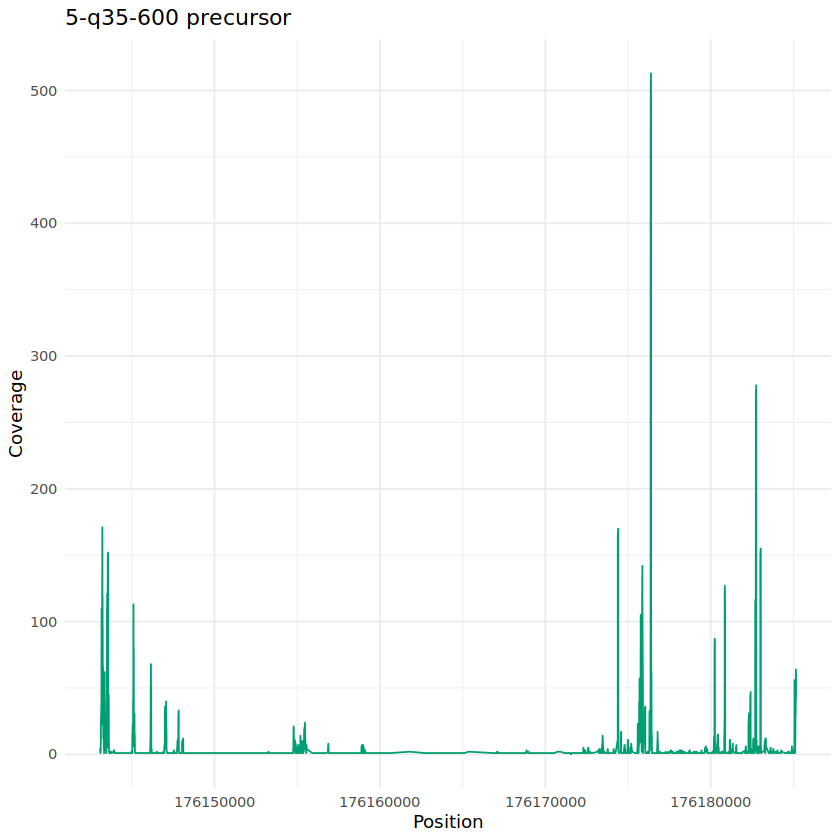

In [39]:
precursor <- subset(intersect, intersect[, 9] == "5-q35-600")
cbPalette <- c( "#E69F00",  "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
ggplot(precursor, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("5-q35-600 precursor")

# pi-NUDT3 precursor

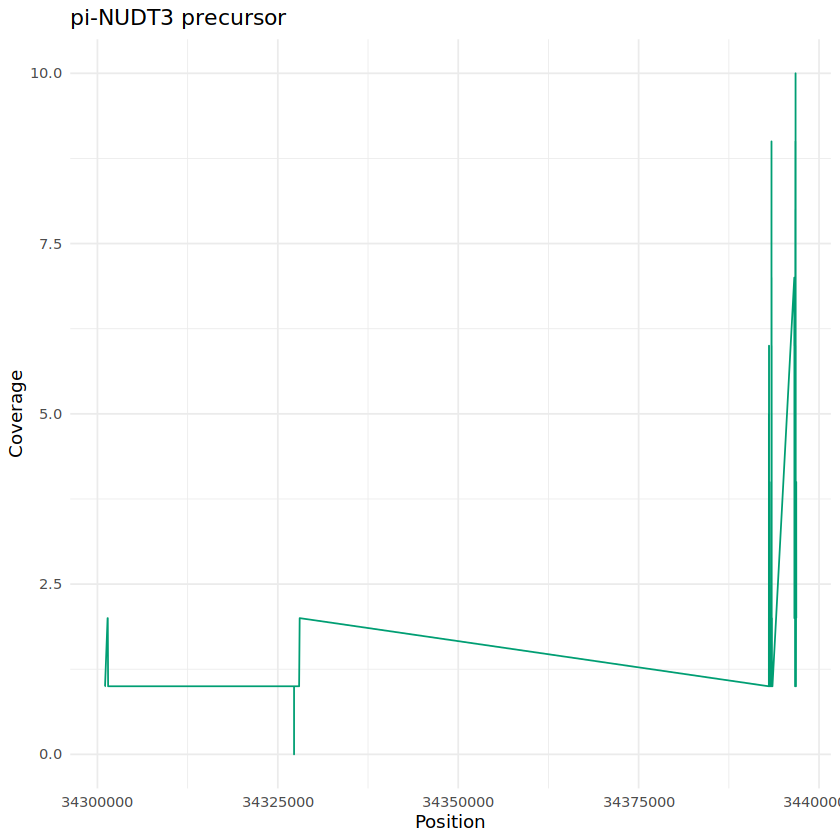

In [40]:
precursor <- subset(intersect, intersect[, 9] == "pi-NUDT3")
cbPalette <- c( "#E69F00",  "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
ggplot(precursor, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("pi-NUDT3 precursor")

# 8-q24-4652 precursor

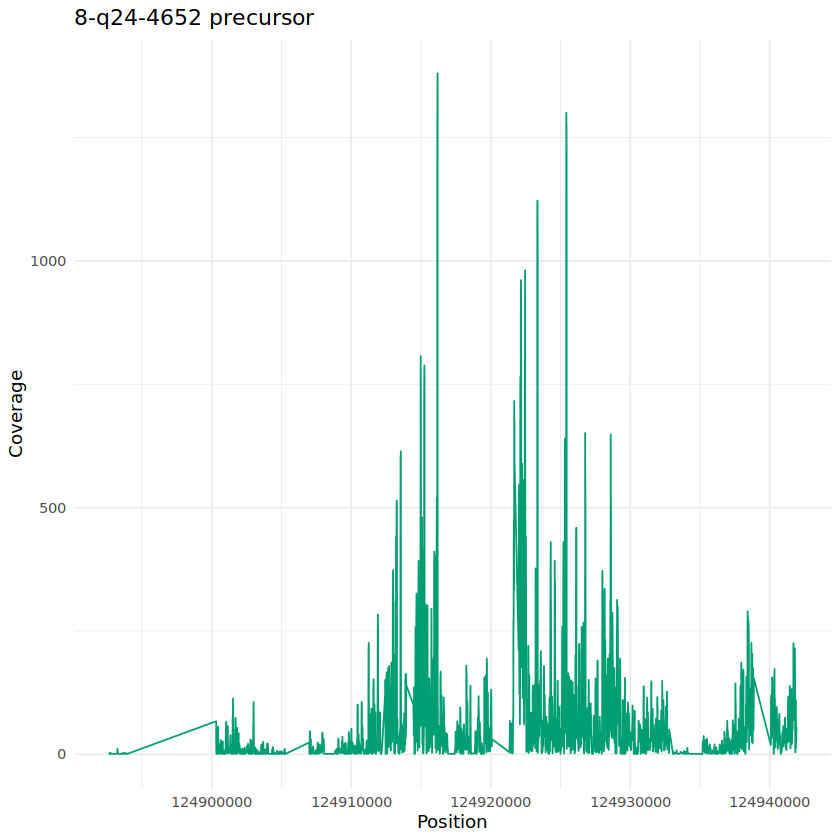

In [42]:
precursor <- subset(intersect, intersect[, 9] == "8-q24-4652")
cbPalette <- c( "#E69F00",  "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
ggplot(precursor, aes(V3,V4))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("8-q24-4652 precursor")

# Create a dataframe with information for each precursor

In [7]:
new_df <- intersect %>%
  distinct(V9) %>%
  select(V9)

row.names(new_df) <- new_df$V9
colnames(new_df)[1]<-"Precursor_Name"

reads<- intersect %>%
    group_by(V9) %>%
    summarize(reads = sum(V4)/n()) %>%
    pull(reads)
new_df$coverage <- reads

len_size <- intersect %>%
  group_by(V9) %>%
  summarize(len_size = max(V7-V6)) %>%
  pull(len_size)
new_df$len_size<-len_size

max_coverage <- intersect %>%
  group_by(V9) %>%
  summarize(max_coverage = max(V4)) %>%
  pull(max_coverage)
new_df$max_coverage<-max_coverage

peaks <- intersect %>%
  group_by(V9) %>%
  summarize(total_peaks = sum(V4>50)) %>%
  pull(total_peaks)
new_df$number_peaks<-peaks

annotation <- intersect %>%
    group_by(V9) %>%
    summarize(annotation_names=paste(unique(V14), collapse = ", ")) %>%
  pull(annotation_names)
new_df$annotation<-annotation

chr <- intersect %>%
    group_by(V9) %>%
    summarize(chr=paste(unique(V5), collapse = ", ")) %>%
  pull(chr)
new_df$chr<-chr

head(new_df)

,Precursor_Name,coverage,len_size,max_coverage,number_peaks,annotation,chr
pi-SLC35E2B,pi-SLC35E2B,83.74240,84295,1972,1728,"XLOC_008295, GRHL3-AS1",chr1
1-p36-1107,1-p36-1107,126.49727,6360,1270,691,"XLOC_012343, XLOC_012344",chr1
pi-ZBTB37,pi-ZBTB37,18.13594,17793,159,224,"XLOC_013312, XLOC_013313, XLOC_013314, LOC105372956",chr1
1-q25-2976,1-q25-2976,1167.50242,6595,20365,11844,"LINC00837, LINC01517",chr10
1-q41-289,1-q41-289,34.72954,3191,364,1226,ZNF22-AS1,chr10
pi-ANKRD20A8P,pi-ANKRD20A8P,528.80836,19914,18503,8356,"XLOC_016164, XLOC_016165, XLOC_019934, XLOC_019935, XLOC_019940",chr10


In [8]:
table(new_df$number_peaks)


    0     5    23    28    29    30    33    36    53    54    59    61    62 
   44     1     1     2     1     1     2     2     1     1     1     1     1 
   63    76    83    91    96   116   134   141   166   182   224   258   262 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  279   312   323   325   375   471   498   586   592   648   691   761   810 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  817   878   930   944   945  1226  1259  1269  1292  1315  1317  1325  1348 
    1     1     1     1     1     1     1     2     1     1     1     1     1 
 1402  1465  1476  1609  1654  1666  1728  1950  1958  1980  2110  2122  2166 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
 2336  2472  2554  2894  3064  3136  3180  3208  3468  3565  3652  3748  3793 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
 3867  4238  4746  5694  5801  6217  6612  6708  68

In [138]:
table(new_df$chr)


 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
    5     9     7    11     2     3    15    10    10     4     8     7     3 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX 
    2     3    10     1     5    12     3     4    16     2 

In [139]:
nrow(new_df)

[1] 152

In [142]:
nrow(new_df %>% filter(coverage>100))

[1] 33

There are 33 precursors having a mean coverage higher than 100

In [143]:
nrow(new_df %>% filter(coverage<100))

[1] 119

There are 119 precursors having a mean coverage lower than 100

In [158]:
nrow(new_df %>% filter(number_peaks > 100))

[1] 88

There are 88 precursors having more than 100 peakcs

In [159]:
nrow(new_df %>% filter(number_peaks < 100))

[1] 64

There are 64 precursors having less than 100 peacks

# See relation between the peaks and the coverage

`geom_smooth()` using formula = 'y ~ x'

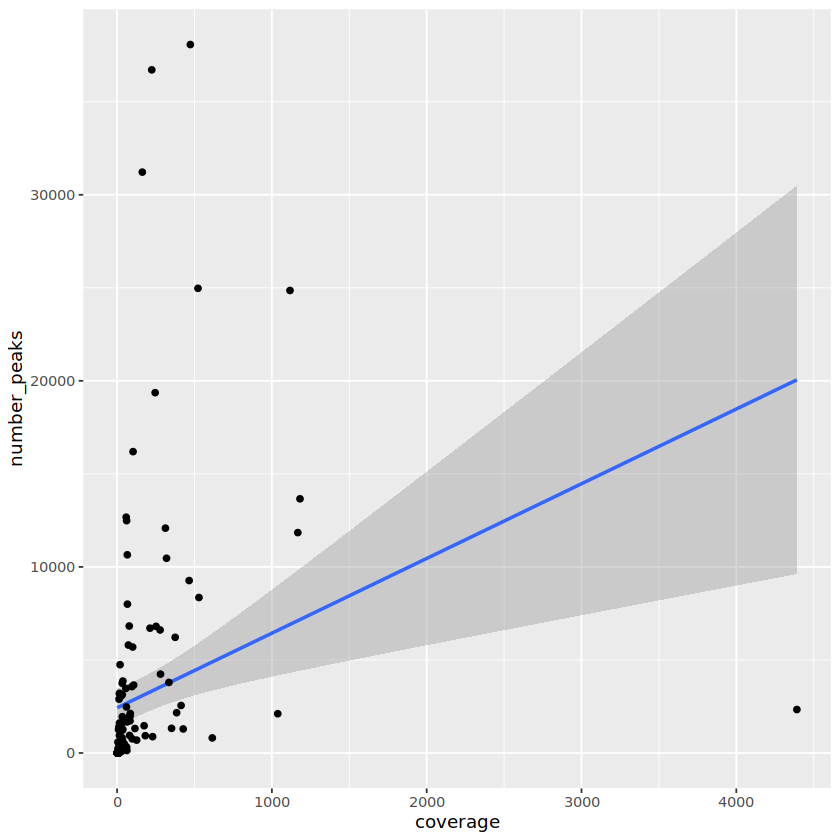

In [188]:
ggplot(new_df,aes(coverage,number_peaks))+geom_smooth(method='lm')+geom_point()

Remove the outliers

`geom_smooth()` using formula = 'y ~ x'

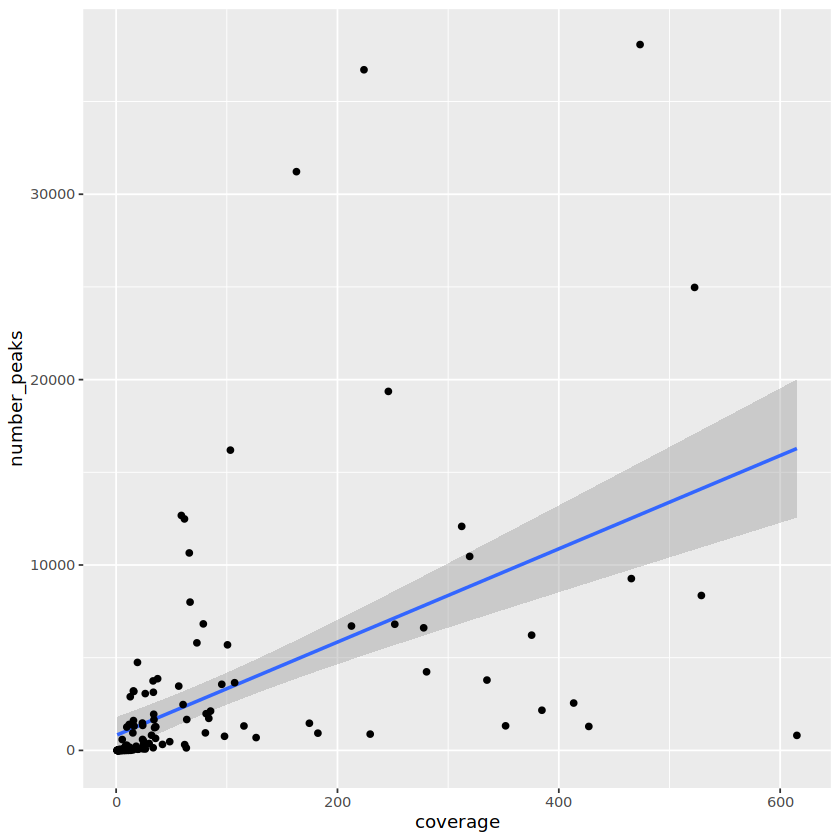

In [192]:
ggplot(new_df%>% filter(coverage<1000),aes(coverage,number_peaks))+geom_smooth(method='lm')+geom_point()

# See relation between the peaks and the size

`geom_smooth()` using formula = 'y ~ x'

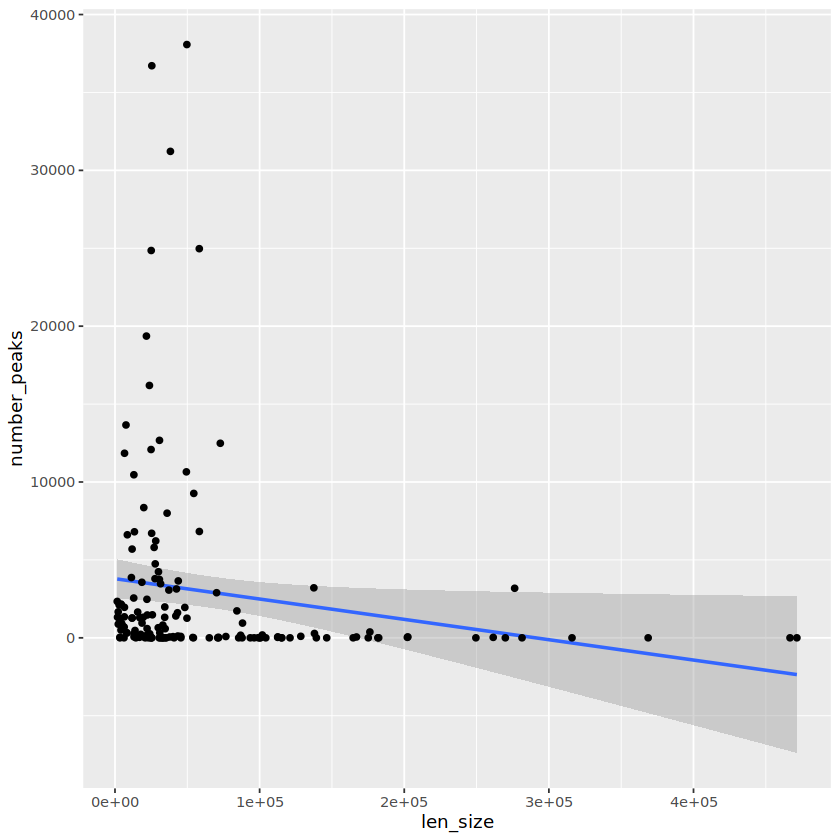

In [193]:
ggplot(new_df,aes(len_size,number_peaks))+geom_smooth(method='lm')+geom_point()

# Select the precursors having low coverage and low peaks

In [16]:
precursors= new_df %>% filter(number_peaks<25 & coverage<100)

In [17]:
precursors

,Precursor_Name,coverage,len_size,max_coverage,number_peaks,annotation,chr
2-q13-9453,2-q13-9453,2.347787,115121,14,0,"XLOC_020130, NUTM2A-AS1",chr10
pi-MCC,pi-MCC,1.000000,32581,1,0,XLOC_051828,chr15
pi-SPATA31D1,pi-SPATA31D1,2.988506,6227,7,0,XLOC_095303,chr21
9-q22-2190,9-q22-2190,2.829268,20871,17,0,"XLOC_103463, XLOC_107906, XLOC_103464",chr3
pi-TSTD2,pi-TSTD2,1.510204,23141,2,0,XLOC_105118,chr3
pi-SIK2,pi-SIK2,9.539843,3434,50,0,LINC01501,chr9
12-p13-6740,12-p13-6740,3.129600,368641,17,0,"XLOC_051838, XLOC_051844, XLOC_051846, XLOC_051847, XLOC_051848, XLOC_051850",chr15
12-p13-1820,12-p13-1820,8.325444,100071,46,0,"XLOC_058996, XLOC_058997, XLOC_058998, XLOC_058999, XLOC_059000, XLOC_059001, XLOC_059002, XLOC_059003, XLOC_059004, XLOC_059005, XLOC_059006, XLOC_059007, XLOC_059008, XLOC_059009",chr17
12-q13-1035,12-q13-1035,1.500000,54226,2,0,XLOC_149885,chr9
12-q24-1580,12-q24-1580,1.977230,471474,7,0,"XLOC_126825, XLOC_126831, XLOC_126832, XLOC_126833, BTBD9-AS1, XLOC_126839, LOC105375044",chr6


In [20]:
nrow(precursors)

[1] 46

In [40]:
46/182

[1] 0.2527473

This 46 (25%) precursors have a low number of peaks and low coverage.

for (i in precursors){
    precursor <- subset(intersect, intersect[,9] == i)
    print(unique(precursor$V8))
    plot(ggplot(precursor, aes(V3,V4))+
        geom_line(color="#009E73")+
        theme_minimal()+
        labs(x="Position",y="Coverage") +
        ggtitle(paste(i," precursor",sep="")))
    }

# Intersect precursors and Human1 unique and multiple

In [25]:
setwd("~/piRNA/Workspaces/julia/piRNA_reads/mapping_species/coverage/Hum1")
intersect<- read.table("intersect_Hum1_precursors.bed", header=FALSE)
head(intersect)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251583,24251584,2
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251584,24251585,2
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251585,24251586,2
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251586,24251587,2
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251587,24251588,8
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251588,24251589,8


In [26]:
nrow(intersect)

[1] 1292064

In [27]:
length(unique(intersect$V5))

[1] 182

There are 182 precursors intersecting at least once

In [28]:
head(arrange(intersect, (V10)), 20)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
chr10,28789400,28795995,Pachytene,10-p11-10777,6595,chr10,28790437,28790438,0
chr12,9323181,9346990,Pachytene,12-p13-6740,23809,chr12,9330632,9330633,0
chr13,31338833,31374861,Pachytene,13-q12-4738,36028,chr13,31357199,31357200,0
chr13,31338833,31374861,Pachytene,13-q12-4738,36028,chr13,31359409,31359410,0
chr15,62223875,62282161,Pachytene,15-q22-56093,58286,chr15,62235472,62235473,0
chr15,62223875,62282161,Pachytene,15-q22-56093,58286,chr15,62235878,62235879,0
chr15,85202204,85234785,Hybrid,15-q25-448,32581,chr15,85204927,85204928,0
chr15,96761583,96783312,Pachytene,15-q26-7771,21729,chr15,96769990,96769991,0
chr17,18379854,18410824,Pachytene,17-p11-4161,30970,chr17,18386432,18386433,0
chr17,18379854,18410824,Pachytene,17-p11-4161,30970,chr17,18400693,18400694,0


# 	10-p11-10777 precursor

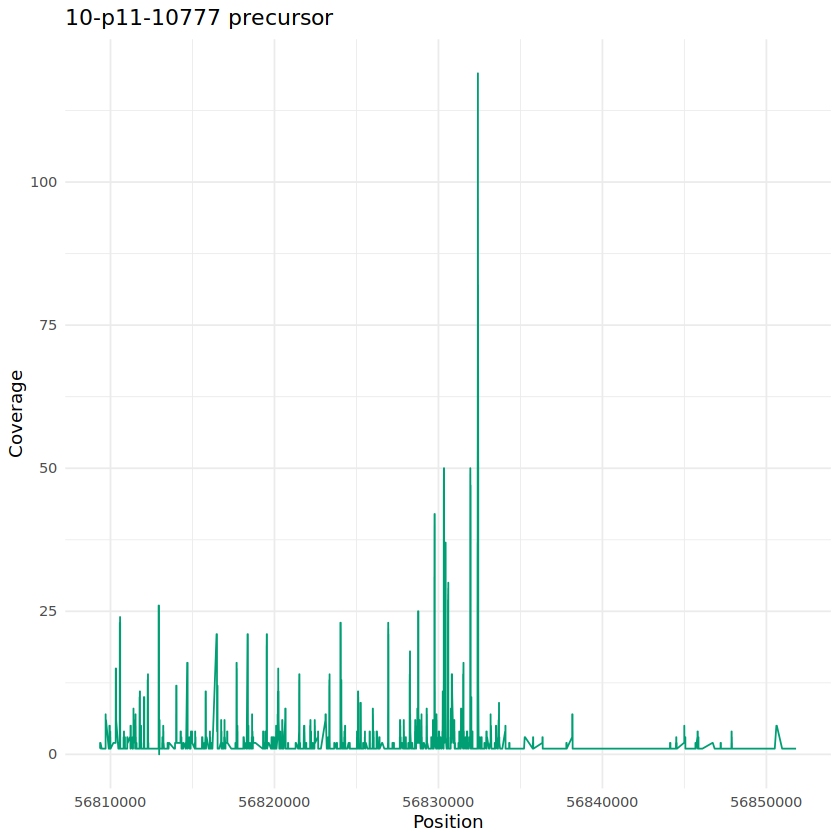

In [35]:
precursor1 <- subset(intersect, intersect[, 5] == "7-p11-1545")
ggplot(precursor1, aes(V8,V10))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("10-p11-10777 precursor")

# Create a dataframe with information for each precursor

In [36]:
new_df2 <- intersect %>%
  distinct(V5) %>%
  select(V5)

row.names(new_df2) <- new_df2$V5
colnames(new_df2)[1]<-"Precursor_Name"

reads<- intersect %>%
    group_by(V5) %>%
    summarize(reads = sum(V10)/n()) %>%
    pull(reads)
new_df2$coverage <- reads

len_size <- intersect %>%
  group_by(V5) %>%
  summarize(len_size = max(V3-V2)) %>%
  pull(len_size)
new_df2$len_size<-len_size

max_coverage <- intersect %>%
  group_by(V5) %>%
  summarize(max_coverage = max(V10)) %>%
  pull(max_coverage)
new_df2$max_coverage<-max_coverage

peaks <- intersect %>%
  group_by(V5) %>%
  summarize(total_peaks = sum(V10>50)) %>%
  pull(total_peaks)
new_df2$number_peaks<-peaks

start_position<- intersect %>%
    group_by(V5) %>%
    summarize(start= min(V9)) %>%
    pull(start)
new_df2$start_position<-start_position

end_position<- intersect %>%
    group_by(V5) %>%
    summarize(end= max(V9)) %>%
    pull(end)
new_df2$end_position<-end_position
head(new_df2)

,Precursor_Name,coverage,len_size,max_coverage,number_peaks,start_position,end_position
1-p36-1107,1-p36-1107,19.897652,84295,788,149,24251584,24324439
1-q25-2976,1-q25-2976,56.935398,6360,2202,812,179585494,179591702
1-q41-289,1-q41-289,4.903188,17793,69,55,222471984,222489676
10-p11-10777,10-p11-10777,203.884295,6595,5862,1287,28789489,28795995
10-q11-242,10-q11-242,6.668695,3191,74,41,44997698,45000742
10-q22-16903,10-q22-16903,52.318273,19914,7687,3527,77764000,77783913


In [37]:
precursors2= new_df2 %>% filter(number_peaks<50 & coverage<100)


In [38]:
nrow(precursors2)

[1] 75

In [40]:
75/182

[1] 0.4120879

The 41% of the precursors have a low number of peaks and low coverage

In [41]:
precursors2

,Precursor_Name,coverage,len_size,max_coverage,number_peaks,start_position,end_position
10-q11-242,10-q11-242,6.668695,3191,74,41,44997698,45000742
10-q22-295,10-q22-295,3.560279,4134,27,0,83560993,83565022
10-q23-1174,10-q23-1174,2.371771,115121,27,0,87204778,87314536
10-q23-411,10-q23-411,3.245031,43235,32,0,89789327,89831978
12-p13-836,12-p13-836,5.802247,24099,129,28,3437426,3461490
21-q22-133,21-q22-133,3.167758,6227,18,0,44494479,44499492
22-q11-182,22-q11-182,9.952349,15197,314,28,20689622,20703697
5-q35-131,5-q35-131,4.372203,3398,29,0,180681199,180684528
6-p21-438,6-p21-438,2.664589,37831,57,22,39115078,39152240
6-p24-803,6-p24-803,9.829457,34434,73,45,11044898,11079113


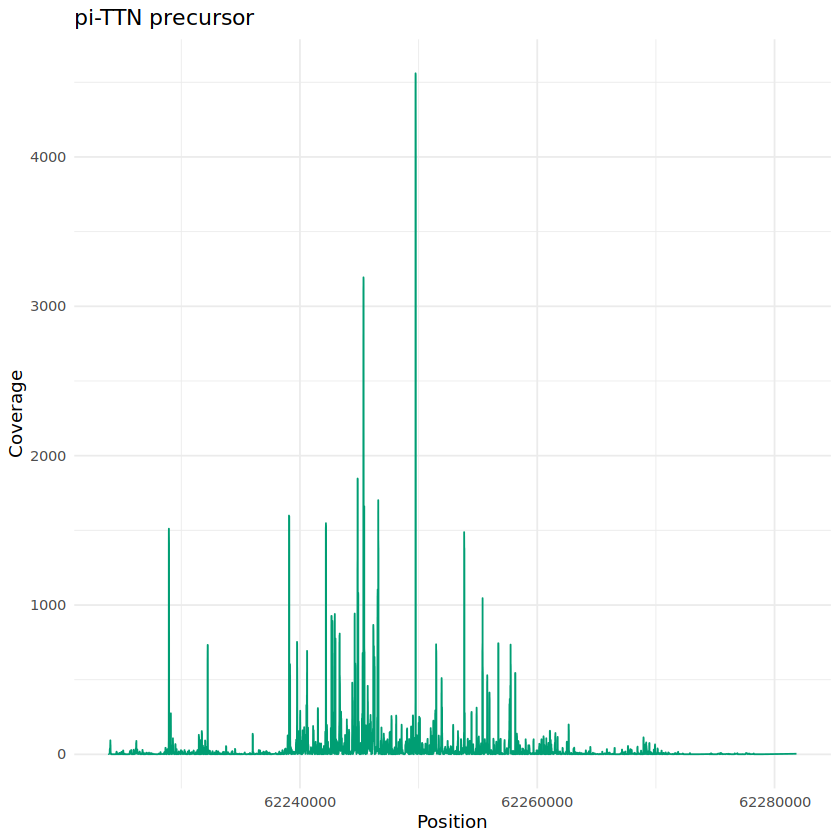

In [44]:
precursor <- subset(intersect, intersect[, 5] == "15-q22-56093")
cbPalette <- c( "#E69F00",  "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
ggplot(precursor, aes(V9,V10))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("pi-TTN precursor")

In [53]:
common_precursors<- merge(precursors,precursors2, by="Precursor_Name")

In [54]:
common_precursors

Precursor_Name,coverage.x,len_size.x,max_coverage.x,number_peaks.x,coverage.y,len_size.y,max_coverage.y,number_peaks.y,start_position,end_position
pi-JRK,8.756281,15197,96,28,4.269782,12535,52,18,142657544,142666516
pi-PDPK1,1.745353,83910,8,0,3.185095,65225,99,27,2538047,2602954
pi-TEX261,4.211277,115121,44,0,6.214651,8860,62,33,70985997,70994747
pi-TP53DP1,7.650624,58310,53,4,4.200000,90111,61,30,43403134,43479984
pi-ZNF528,1.509697,281435,8,0,2.914490,25089,44,0,52398376,52422640


In [55]:
nrow(common_precursors)

[1] 5

In [87]:
8/182

[1] 0.04395604

4% of the precursors having low coverage and low number of peaks are common between the two samples

# Intersect Human 2 with precursors h38

In [88]:
setwd("~/piRNA/Workspaces/julia/lnc")
intersect<- read.table("intersect_h38_hum2.bed", header=FALSE)
head(intersect)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251480,24251481,1
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251481,24251482,1
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251482,24251483,1
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251483,24251484,1
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251484,24251485,1
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251485,24251486,1


In [89]:
nrow(intersect)

[1] 1556565

In [90]:
length(unique(intersect$V5))

[1] 180

There are 180/182 precursors intersecting at least once

# Create a dataframe with information for each precursor

In [91]:
new_df3 <- intersect %>%
  distinct(V5) %>%
  select(V5)

row.names(new_df3) <- new_df3$V5
colnames(new_df3)[1]<-"Precursor_Name"

reads<- intersect %>%
    group_by(V5) %>%
    summarize(reads = sum(V10)/n()) %>%
    pull(reads)
new_df3$coverage <- reads

len_size <- intersect %>%
  group_by(V5) %>%
  summarize(len_size = max(V3-V2)) %>%
  pull(len_size)
new_df3$len_size<-len_size

max_coverage <- intersect %>%
  group_by(V5) %>%
  summarize(max_coverage = max(V10)) %>%
  pull(max_coverage)
new_df3$max_coverage<-max_coverage

peaks <- intersect %>%
  group_by(V5) %>%
  summarize(total_peaks = sum(V10>50)) %>%
  pull(total_peaks)
new_df3$number_peaks<-peaks

start_position<- intersect %>%
    group_by(V5) %>%
    summarize(start= min(V9)) %>%
    pull(start)
new_df3$start_position<-start_position

end_position<- intersect %>%
    group_by(V5) %>%
    summarize(end= max(V9)) %>%
    pull(end)
new_df3$end_position<-end_position
head(new_df3)

,Precursor_Name,coverage,len_size,max_coverage,number_peaks,start_position,end_position
1-p36-1107,1-p36-1107,25.632719,84295,1997,203,24251481,24329584
1-q25-2976,1-q25-2976,80.243362,6360,2606,1155,179585495,179591255
1-q41-289,1-q41-289,10.269058,17793,69,44,222472469,222476555
10-p11-10777,10-p11-10777,209.741738,6595,3805,1578,28789491,28795995
10-q11-242,10-q11-242,7.713304,3191,72,28,44997698,45000742
10-q22-16903,10-q22-16903,76.098367,19914,4988,4760,77764000,77783913


In [92]:
precursors3= new_df3 %>% filter(number_peaks<25 & coverage<100)


In [93]:
nrow(precursors3)

[1] 23

In [94]:
23/182

[1] 0.1263736

The  12% of the precursors have a low number of peaks and low coverage

In [95]:
precursors3

,Precursor_Name,coverage,len_size,max_coverage,number_peaks,start_position,end_position
10-q23-1174,10-q23-1174,2.470073,115121,16,0,87208039,87312864
12-p13-1820,12-p13-1820,2.235187,34693,12,0,9367473,9402033
15-q26-361,15-q26-361,3.562236,24009,22,0,91273167,91296945
17-p11-4442,17-p11-4442,5.467936,33082,50,0,20535239,20566657
17-q21-659,17-q21-659,3.666204,49765,49,0,47017724,47067488
21-q22-133,21-q22-133,5.539660,6227,59,17,44494478,44499970
5-q35-131,5-q35-131,5.826742,3398,33,0,180681199,180684547
6-p21-438,6-p21-438,2.503915,37831,20,0,39115091,39152239
8-q24-335,8-q24-335,4.501777,37258,39,0,124942055,124979231
9-q31-7934,9-q31-7934,9.811359,8163,56,6,113103449,113105280


In [96]:
common_precursors<- merge(precursors,precursors3, by="Precursor_Name")

In [97]:
common_precursors

Precursor_Name,coverage.x,len_size.x,max_coverage.x,number_peaks.x,coverage.y,len_size.y,max_coverage.y,number_peaks.y,start_position,end_position
12-p13-1820,5.300923,121011,59,49,2.235187,34693,12,0,9367473,9402033
pi-GOLGA8B,5.348837,31291,19,0,2.361596,58310,6,0,34525349,34583599
X-p22-3627,5.934993,25089,32,0,5.624885,40172,77,18,9403345,9443447


In [98]:
nrow(common_precursors)

[1] 3

In [99]:
3/182

[1] 0.01648352

1.6% of the precursors having low coverage and low number of peaks are common between the two samples

In [100]:
common_precursors<- merge(precursors2,precursors3, by="Precursor_Name")

In [101]:
common_precursors

Precursor_Name,coverage.x,len_size.x,max_coverage.x,number_peaks.x,start_position.x,end_position.x,coverage.y,len_size.y,max_coverage.y,number_peaks.y,start_position.y,end_position.y
10-q23-1174,4.687500,115121,7,0,87215998,87223203,2.470073,115121,16,0,87208039,87312864
12-p13-1820,2.322904,34693,10,0,9367473,9402025,2.235187,34693,12,0,9367473,9402033
15-q26-361,2.691589,24009,15,0,91277847,91296945,3.562236,24009,22,0,91273167,91296945
17-p11-4442,3.457460,33082,51,18,20535109,20565542,5.467936,33082,50,0,20535239,20566657
17-q21-659,4.209469,49765,40,0,47017724,47064279,3.666204,49765,49,0,47017724,47067488
21-q22-133,3.255141,6227,16,0,44494596,44499492,5.539660,6227,59,17,44494478,44499970
5-q35-131,3.800000,3398,16,0,180681199,180684528,5.826742,3398,33,0,180681199,180684547
6-p21-438,2.379850,37831,33,0,39115078,39152240,2.503915,37831,20,0,39115091,39152239
8-q24-335,4.233474,37258,61,21,124942071,124979312,4.501777,37258,39,0,124942055,124979231
9-q31-7934,4.301282,8163,19,0,113103546,113105266,9.811359,8163,56,6,113103449,113105280


In [102]:
nrow(common_precursors)

[1] 22

In [103]:
22/182

[1] 0.1208791

In [104]:
names<- common_precursors$Precursor_Name

In [105]:
names

[1] 10-q23-1174 12-p13-1820 15-q26-361  17-p11-4442 17-q21-659  21-q22-133 
 [7] 5-q35-131   6-p21-438   8-q24-335   9-q31-7934  pi-ANKRD18B pi-ANKRD36B
[13] pi-GOLGA8A  pi-GOLGA8B  pi-KDM5A    pi-MLEC     pi-NAA35    pi-ST6GAL2 
[19] pi-TEAD1    pi-TTN      pi-ZBTB37   X-p22-3627 
179 Levels: 1-p36-1107 1-q25-2976 1-q41-289 10-p11-10777 ... X-p22-3627

In [119]:
setwd("~/piRNA/Workspaces/julia/lnc")
h38<- read.table("h38.bed", header=FALSE)
head(h38)

V1,V2,V3,V4,V5,V6
chr1,24251429,24335724,Pachytene,1-p36-1107,84295
chr1,179585426,179591786,Pachytene,1-q25-2976,6360
chr1,222471907,222489700,Prepachytene,1-q41-289,17793
chr10,28789400,28795995,Pachytene,10-p11-10777,6595
chr10,44997697,45000888,Pachytene,10-q11-242,3191
chr10,77763999,77783913,Pachytene,10-q22-16903,19914


In [128]:
data<-  subset(h38, !(V5 %in% c("10-q23-1174", "12-p13-1820", "15-q26-361", 
                                      "17-p11-4442", "17-q21-659", "21-q22-133", "5-q35-131", 
                                      "6-p21-438", "8-q24-335", "9-q31-7934", "pi-ANKRD18B", 
                                      "pi-ANKRD36B", "pi-GOLGA8A", "pi-GOLGA8B", "pi-KDM5A", 
                                      "pi-MLEC", "pi-NAA35", "pi-ST6GAL2", "pi-TEAD1", "pi-TTN", 
                                      "pi-ZBTB37", "X-p22-3627")))


In [129]:
nrow(data)

[1] 160

In [130]:
write.table(data, file = "h38_filter.bed", quote=FALSE, sep="\t", row.names = FALSE, col.names=FALSE)

# Intersect precursors and Human1 unique

In [1]:
setwd("~/piRNA/Workspaces/julia/lnc")
intersect<- read.table("intersect_h38_hum1.bed", header=FALSE)
head(intersect)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251583,24251584,2
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251584,24251585,2
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251585,24251586,2
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251586,24251587,2
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251587,24251588,8
chr1,24251429,24335724,Pachytene,1-p36-1107,84295,chr1,24251588,24251589,8


In [2]:
nrow(intersect)

[1] 938372

In [3]:
length(unique(intersect$V5))

[1] 179

There are 179/182 precursors intersecting at least once

In [21]:
head(arrange(intersect, (V10)), 20)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
chr12,9323181,9346990,Pachytene,12-p13-6740,23809,chr12,9330632,9330633,0
chr12,9323181,9346990,Pachytene,12-p13-6740,23809,chr12,9346580,9346581,0
chr13,31338833,31374861,Pachytene,13-q12-4738,36028,chr13,31357199,31357200,0
chr15,62223875,62282161,Pachytene,15-q22-56093,58286,chr15,62227732,62227733,0
chr15,62223875,62282161,Pachytene,15-q22-56093,58286,chr15,62235472,62235473,0
chr15,62223875,62282161,Pachytene,15-q22-56093,58286,chr15,62235878,62235879,0
chr15,62223875,62282161,Pachytene,15-q22-56093,58286,chr15,62241657,62241658,0
chr15,92580828,92620079,Pachytene,15-q26-10588,39251,chr15,92605778,92605779,0
chr15,96761583,96783312,Pachytene,15-q26-7771,21729,chr15,96769990,96769991,0
chr15,96761583,96783312,Pachytene,15-q26-7771,21729,chr15,96774549,96774550,0


# 	6-p21-16923 precursor

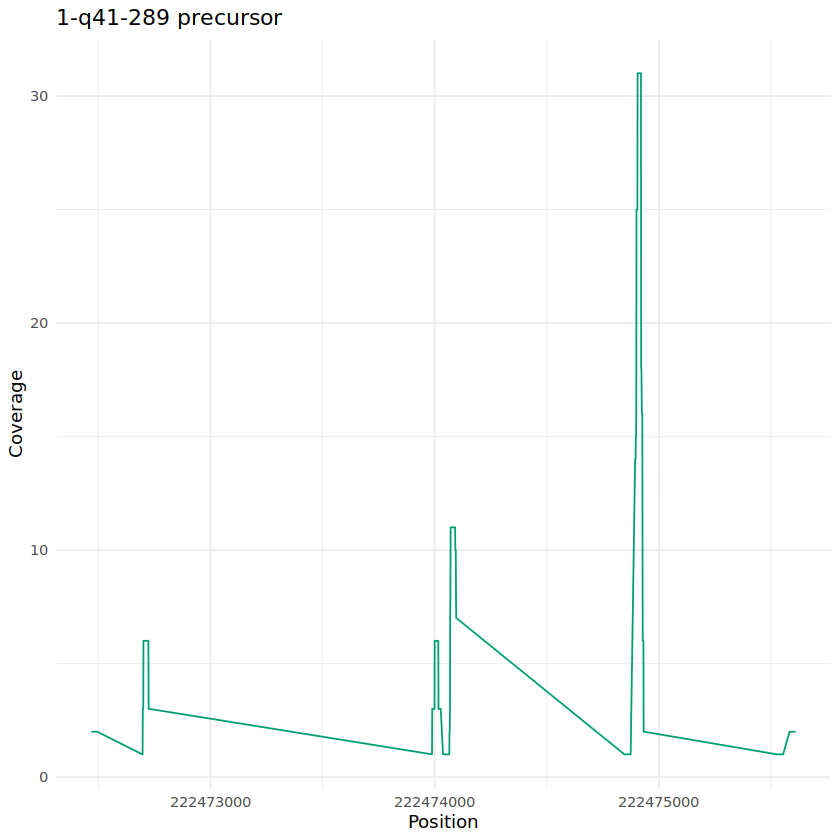

In [24]:
precursor1 <- subset(intersect, intersect[, 5] == "1-q41-289")
ggplot(precursor1, aes(V8,V10))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("1-q41-289 precursor")

# Create a dataframe with information for each precursor

In [75]:
new_df2 <- intersect %>%
  distinct(V5) %>%
  select(V5)

row.names(new_df2) <- new_df2$V5
colnames(new_df2)[1]<-"Precursor_Name"

reads<- intersect %>%
    group_by(V5) %>%
    summarize(reads = sum(V10)/n()) %>%
    pull(reads)
new_df2$coverage <- reads

len_size <- intersect %>%
  group_by(V5) %>%
  summarize(len_size = max(V3-V2)) %>%
  pull(len_size)
new_df2$len_size<-len_size

max_coverage <- intersect %>%
  group_by(V5) %>%
  summarize(max_coverage = max(V10)) %>%
  pull(max_coverage)
new_df2$max_coverage<-max_coverage

peaks <- intersect %>%
  group_by(V5) %>%
  summarize(total_peaks = sum(V10>50)) %>%
  pull(total_peaks)
new_df2$number_peaks<-peaks

start_position<- intersect %>%
    group_by(V5) %>%
    summarize(start= min(V9)) %>%
    pull(start)
new_df2$start_position<-start_position

end_position<- intersect %>%
    group_by(V5) %>%
    summarize(end= max(V9)) %>%
    pull(end)
new_df2$end_position<-end_position
head(new_df2)

,Precursor_Name,coverage,len_size,max_coverage,number_peaks,start_position,end_position
1-p36-1107,1-p36-1107,16.241588,84295,738,57,24251584,24324365
1-q25-2976,1-q25-2976,29.840125,6360,774,327,179585494,179591702
1-q41-289,1-q41-289,5.881119,17793,31,0,222472470,222475611
10-p11-10777,10-p11-10777,114.324531,6595,5444,965,28789489,28795976
10-q11-242,10-q11-242,6.397520,3191,71,41,44997698,45000742
10-q22-16903,10-q22-16903,28.877214,19914,1700,1654,77764000,77783913


In [79]:
precursors2= new_df2 %>% filter(number_peaks<25 & coverage<100)


In [80]:
nrow(precursors2)

[1] 71

In [81]:
71/182

[1] 0.3901099

The  39% of the precursors have a low number of peaks and low coverage

In [82]:
precursors2

,Precursor_Name,coverage,len_size,max_coverage,number_peaks,start_position,end_position
1-q41-289,1-q41-289,5.881119,17793,31,0,222472470,222475611
10-q22-295,10-q22-295,3.359076,4134,24,0,83560993,83565022
10-q23-1174,10-q23-1174,4.687500,115121,7,0,87215998,87223203
10-q23-411,10-q23-411,2.889495,43235,26,0,89789327,89831978
12-p13-1820,12-p13-1820,2.322904,34693,10,0,9367473,9402025
15-q26-361,15-q26-361,2.691589,24009,15,0,91277847,91296945
17-p11-4442,17-p11-4442,3.457460,33082,51,18,20535109,20565542
17-q21-659,17-q21-659,4.209469,49765,40,0,47017724,47064279
17-q24-747,17-q24-747,4.750124,34375,51,15,68101901,68134912
21-q22-133,21-q22-133,3.255141,6227,16,0,44494596,44499492


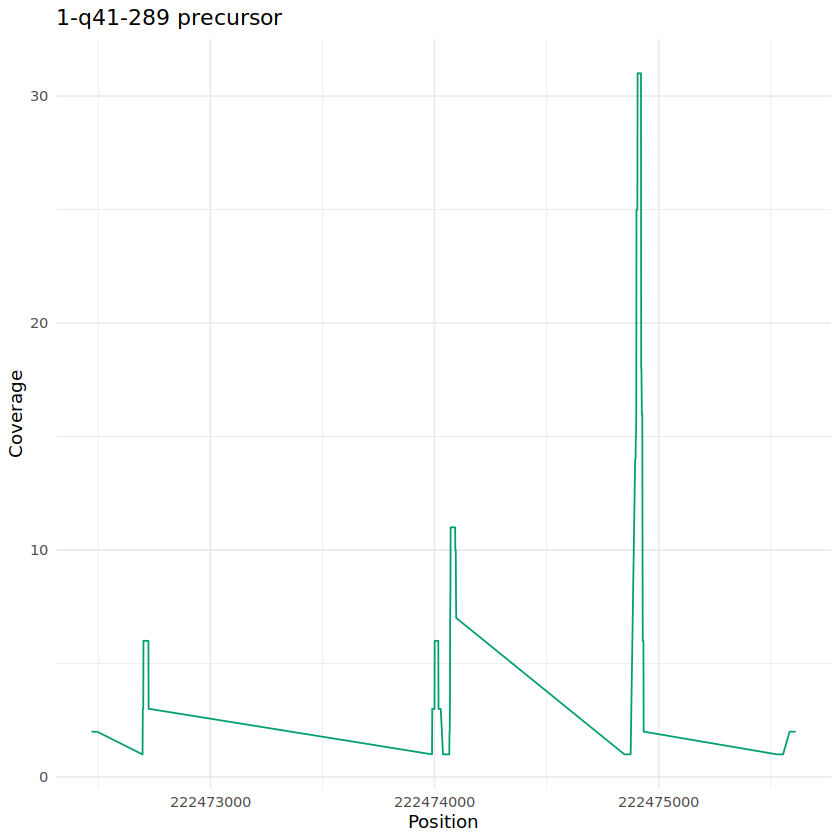

In [83]:
precursor <- subset(intersect, intersect[, 5] == "1-q41-289")
cbPalette <- c( "#E69F00",  "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
ggplot(precursor, aes(V9,V10))+
    geom_line(color="#009E73")+
    theme_minimal()+
    labs(x="Position",y="Coverage") +
    ggtitle("1-q41-289 precursor")

In [84]:
common_precursors<- merge(precursors,precursors2, by="Precursor_Name")

In [85]:
common_precursors

Precursor_Name,coverage.x,len_size.x,max_coverage.x,number_peaks.x,coverage.y,len_size.y,max_coverage.y,number_peaks.y,start_position,end_position
12-p13-1820,5.300923,121011,59,49,2.322904,34693,10,0,9367473,9402025
17-q24-747,7.385508,13737,70,46,4.750124,34375,51,15,68101901,68134912
pi-GOLGA8B,5.348837,31291,19,0,1.659091,58310,3,0,34525600,34583599
pi-JRK,8.756281,15197,96,28,4.144260,12535,45,0,142657710,142666516
pi-PDPK1,1.745353,83910,8,0,3.994901,65225,33,0,2538047,2602808
pi-TP53DP1,7.650624,58310,53,4,3.774886,90111,29,0,43403134,43479984
pi-ZNF528,1.509697,281435,8,0,3.315789,25089,41,0,52398376,52422640
X-p22-3627,5.934993,25089,32,0,4.326271,40172,28,0,9403376,9443408


In [86]:
nrow(common_precursors)

[1] 8

In [87]:
8/182

[1] 0.04395604